In [2]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np


In [3]:
# Get the dataset
rentals = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv')
rentals.head(2)

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.0,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.0,2020,29.33


In [4]:
rentals.Condition.unique()

array(['first_time_use', 'well_kept', 'mint_condition', 'no_information',
       'fully_renovated', 'first_time_use_after_refurbishment',
       'refurbished', 'modernized', 'need_of_renovation'], dtype=object)

In [5]:
rentals.describe()

,Rooms,Rent,Year_Construction,Space
count,764.000000,764.000000,764.000000,764.000000
mean,2.549738,1768.560942,1983.695026,84.656270
std,1.010826,1118.263961,48.006060,44.195338
min,1.000000,271.250000,1864.000000,14.000000
25%,2.000000,1039.500000,1959.000000,55.097500
50%,2.500000,1565.480000,2015.000000,77.600000
75%,3.000000,2170.000000,2019.000000,104.450000
max,7.000000,14207.000000,2020.000000,413.910000


### How many rows does the dataset have?

### The number of rows of the dataset is as follows:

In [6]:
rentals.info()
rentals.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             764 non-null    object 
 1   Condition          764 non-null    object 
 2   Rooms              764 non-null    float64
 3   Rent               764 non-null    float64
 4   Year_Construction  764 non-null    int64  
 5   Space              764 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 35.9+ KB


(764, 6)

#### The number of rows is 760.

### How many different Regions are there?

### The different regions in the dataset-rentals.

In [7]:
rentals.Region.count()

764

In [8]:
print(f' The different regions in the dataset-rentals are {rentals.Region.unique()} and its about {rentals.Region.nunique()} regions.')

 The different regions in the dataset-rentals are ['Mitte' 'Kreuzberg' 'Köpenick' 'Wilmersdorf' 'Charlottenburg'
 'Friedrichsfelde' 'Tiergarten' 'Prenzlauer' 'Wedding' 'Neukölln'] and its about 10 regions.


### What is the maximum rent? What is the minimum rent?

### The maximum rent in the dataset provided is

In [9]:
print(f'The maximum rent is the {rentals.Rent.max()} and the minimum rents is {rentals.Rent.min()}euro in the {rentals.Region.nunique()} regions.')

The maximum rent is the 14207.0 and the minimum rents is 271.25euro in the 10 regions.


### What is the smallest flat?

### The smallest flat in the each region

In [10]:
rentals.groupby('Region')[['Rooms','Space','Rent']].min()

,Rooms,Space,Rent
Region,,,
Charlottenburg,1.0,23.62,478.52
Friedrichsfelde,1.0,25.68,280.74
Kreuzberg,1.0,20.00,435.74
Köpenick,1.0,28.40,558.06
Mitte,1.0,18.00,398.00
Neukölln,1.0,14.00,379.95
Prenzlauer,1.0,18.00,475.00
Tiergarten,1.0,24.00,271.25
Wedding,1.0,19.22,352.95


In [11]:
print(f' In every region, there are {rentals.Rooms.min()} room and the smallest flat in all region is in Neukölln with Space of {rentals.Space.min()} sq_meter.')

 In every region, there are 1.0 room and the smallest flat in all region is in Neukölln with Space of 14.0 sq_meter.


### Groupby Region - What is on average the most expensive region?

### The average most expensive region is Mitte.

In [12]:
rentals.groupby('Region')[['Rent','Space']].mean()


,Rent,Space
Region,,
Charlottenburg,1753.452532,88.083038
Friedrichsfelde,1043.871731,66.145000
Kreuzberg,2049.138085,92.258723
Köpenick,1125.475818,74.279273
Mitte,2408.725033,96.235556
Neukölln,1188.114915,69.849831
Prenzlauer,1996.962264,95.832264
Tiergarten,1914.824795,90.228304
Wedding,847.138571,46.928571


In [13]:
print(f' Mitte is the most expensive region for average rent')

 Mitte is the most expensive region for average rent


### What is the mean rent for the different amount of rooms? 

### The mean rent for each room in Berlin is as follows:

In [14]:
rentals.groupby('Rooms')[['Rent']].mean()

,Rent
Rooms,
1.0,833.258318
1.5,882.735556
2.0,1358.017786
2.5,1691.043750
3.0,2048.237042
3.5,1901.928750
4.0,2690.214242
4.5,1370.000000
5.0,4359.084211


In [15]:
rentals.Condition.nunique()

9

In [16]:
rentals.groupby('Condition')[['Rent','Rooms']].mean()

,Rent,Rooms
Condition,,
first_time_use,1866.564222,2.648148
first_time_use_after_refurbishment,1925.351944,2.875000
fully_renovated,1778.308571,2.514286
mint_condition,2122.196154,2.559441
modernized,1185.705172,2.500000
need_of_renovation,612.290000,2.125000
no_information,1544.274955,2.450450
refurbished,2177.256500,2.375000
well_kept,1217.096979,2.369792


### Which region has the best price per square meter? The cheapest square meter price?

In [17]:
rentals['per_sq_meter']=rentals.Rent/rentals.Space
rentals.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,per_sq_meter
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.687713
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.913740
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.739209


In [18]:
rentals.groupby('Region')[['per_sq_meter']].min()

,per_sq_meter
Region,
Charlottenburg,10.019263
Friedrichsfelde,7.829252
Kreuzberg,11.346000
Köpenick,10.066225
Mitte,15.120052
Neukölln,8.837969
Prenzlauer,10.002556
Tiergarten,8.696825
Wedding,7.950653


In [19]:
#rentals[rentals['Region']]==[rentals['per_sq_meter']].min()

In [20]:
print(f' The cheapest price is Friedrichsfelde.' )

 The cheapest price is Friedrichsfelde.


### Which region has on average the oldest buildings?

In [21]:
rentals['Age']=2021-rentals.Year_Construction
rentals.head(2)

,Region,Condition,Rooms,Rent,Year_Construction,Space,per_sq_meter,Age
0,Mitte,first_time_use,4.0,2659.0,2019,117.20,22.687713,2
1,Kreuzberg,first_time_use,1.0,1200.0,2020,29.33,40.913740,1


In [22]:
rentals.groupby('Region')[['Age']].mean()

,Age
Region,
Charlottenburg,51.012658
Friedrichsfelde,18.461538
Kreuzberg,43.127660
Köpenick,37.890909
Mitte,20.078431
Neukölln,57.474576
Prenzlauer,63.849057
Tiergarten,28.140351
Wedding,43.785714


#### The region with the average oldest building is Prenzlauer.

### Which region has the best "in shape" flats to offer?

In [23]:
in_shape=rentals.query('Condition!="need_of_renovation" & Condition!="no_information"')
in_shape

,Region,Condition,Rooms,Rent,Year_Construction,Space,per_sq_meter,Age
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,22.687713,2
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,40.913740,1
2,Köpenick,well_kept,2.0,979.00,1997,83.61,11.709126,24
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,10.691786,121
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,25.739209,1
...,...,...,...,...,...,...,...,...
759,Wedding,mint_condition,1.0,959.00,2017,27.80,34.496403,4
760,Wedding,mint_condition,1.0,649.00,2017,20.50,31.658537,4
761,Wilmersdorf,mint_condition,4.0,2750.00,2017,110.00,25.000000,4
762,Köpenick,well_kept,2.0,1259.00,2017,91.20,13.804825,4


In [75]:

pd.set_option('display.max_rows',65)


sort_shape=in_shape.groupby(['Region','Condition'])[['Rent']].agg(['count'])
sort_shape.shape

Rent
                                                  count
Region         Condition                               
Charlottenburg first_time_use                        27
               first_time_use_after_refurbishment     7
               fully_renovated                        5
               mint_condition                         9
               modernized                             4
...                                                 ...
Wilmersdorf    fully_renovated                        3
               mint_condition                         6
               modernized                             1
               refurbished                            3
               well_kept                             11

[66 rows x 1 columns]

In [24]:
#for region in in_shape.Region:
    #plt.pie(region, labels = in_shape.Condition, autopct='%.0f%%')
    #plt.show()

In [83]:
sort_shape.index

RangeIndex(start=0, stop=15, step=1)

In [82]:
sort_shape.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Region     15 non-null     float64
 1   Condition  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [73]:
sort_shape.count()

Rent  count    66
dtype: int64

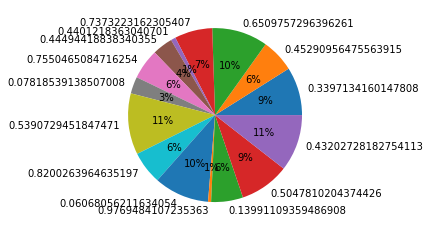

In [81]:
import matplotlib.pyplot as plt
plt.pie(sort_shape.Region, labels = sort_shape.Condition, autopct='%.0f%%')
plt.show()

<AxesSubplot:>

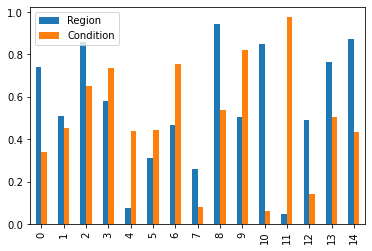

In [76]:
sort_shape = pd.DataFrame(np.random.rand(15, 2), columns=["Region", "Condition"])

sort_shape.plot.bar()


<AxesSubplot:xlabel='Condition', ylabel='Region'>

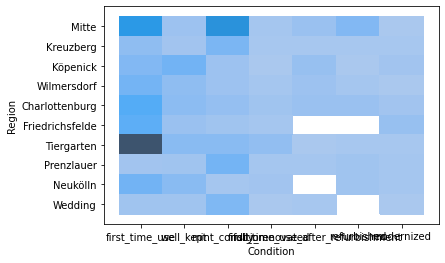

In [67]:
sns.histplot(data=in_shape, x='Condition', y='Region')

1650.00    7
1200.00    7
1800.00    6
1500.00    6
1300.00    5
          ..
1777.00    1
1093.16    1
1629.00    1
1394.00    1
2150.00    1
Name: Rent, Length: 639, dtype: int64

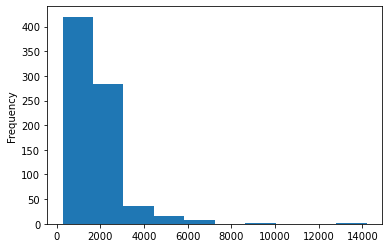

In [11]:
rentals["Rent"].plot.hist()
rentals["Rent"].value_counts()


<AxesSubplot:xlabel='Rent', ylabel='Region'>

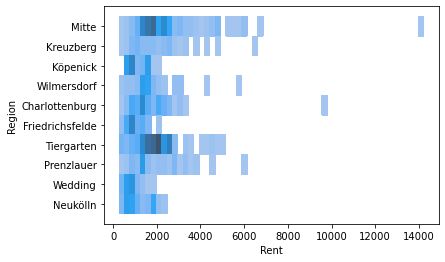

In [12]:
sns.histplot(rentals, x='Rent', y='Region')

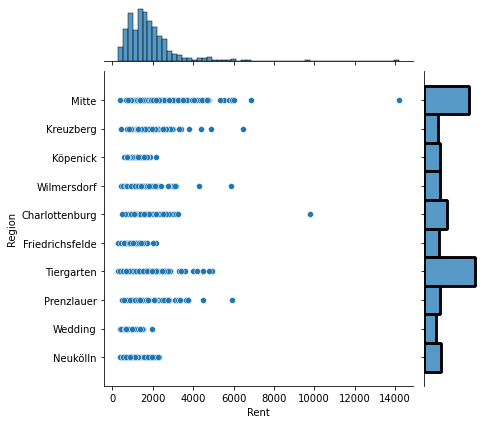

In [13]:
sns.jointplot(data=rentals,y='Region',x='Rent')

### We have to know if Rooms are in the regions and then to check rent in each region as well.

<AxesSubplot:xlabel='Rooms', ylabel='Region'>

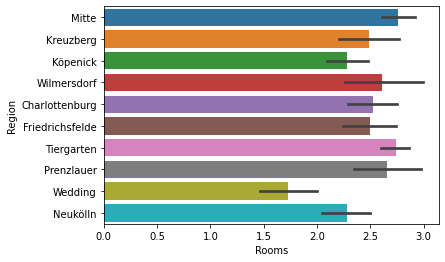

In [14]:
sns.barplot(
    x='Rooms',
    y='Region',
    data=rentals
)

<AxesSubplot:xlabel='Rent', ylabel='Region'>

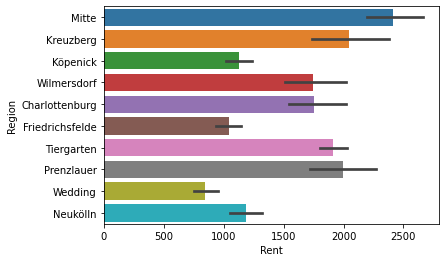

In [15]:
sns.barplot(
    x='Rent',
    y='Region',
    data=rentals
)

In [16]:
#### Regions affect rent in Berlin, as we see clearly.

<AxesSubplot:xlabel='Rent', ylabel='Condition'>

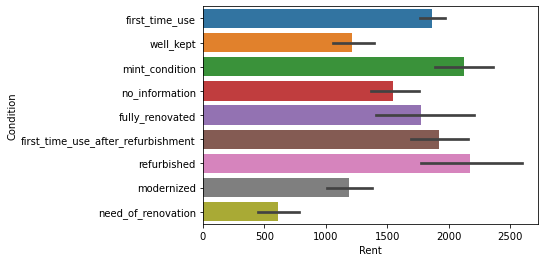

In [17]:
sns.barplot(
    x='Rent',
    y='Condition',
    data=rentals
)

In [18]:
df_rents=rentals[['Rooms','Condition','Rent']]
df_rents.head(2)

,Rooms,Condition,Rent
0,4.0,first_time_use,2659.0
1,1.0,first_time_use,1200.0


<AxesSubplot:xlabel='Rooms', ylabel='Condition'>

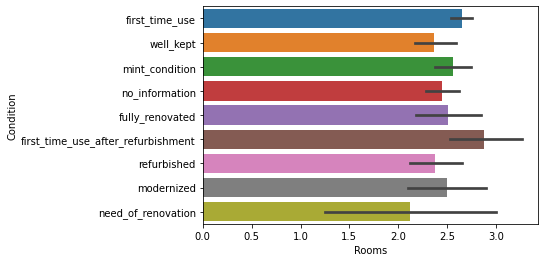

In [19]:
sns.barplot(
    x='Rooms',
    y='Condition',
    data=rentals
)

<AxesSubplot:xlabel='Rent', ylabel='Rooms'>

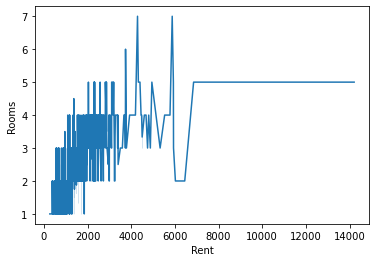

In [20]:
sns.lineplot(x='Rent', y='Rooms', data=rentals)

#### Comparing Rent,Room,Condition with Space side by side; we have a relation. Used a DataFrame multiple barplot where 10 is 0 to 9 and 5 is the number of columns.

<AxesSubplot:>

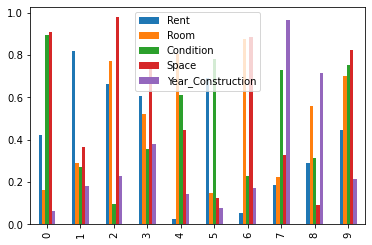

In [30]:
rentals = pd.DataFrame(np.random.rand(10, 5), columns=["Rent", "Room", "Condition", "Space","Year_Construction"])

rentals.plot.bar()


<AxesSubplot:>

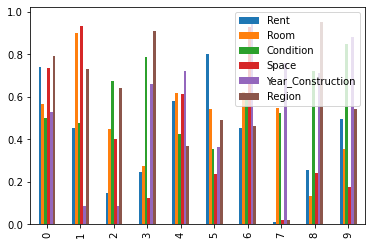

In [31]:
rentals = pd.DataFrame(np.random.rand(10, 6), columns=["Rent", "Room", "Condition", "Space","Year_Construction","Region"])

rentals.plot.bar()

In [33]:
rentals_KPI=rentals.groupby('Condition')['Rent'].describe()[['mean','max','min']]
rentals_KPI

,mean,max,min
Condition,,,
0.354123,0.802215,0.802215,0.802215
0.425936,0.578769,0.578769,0.578769
0.475520,0.454558,0.454558,0.454558
0.502134,0.739618,0.739618,0.739618
0.524956,0.009592,0.009592,0.009592
0.598830,0.451828,0.451828,0.451828
0.676074,0.146974,0.146974,0.146974
0.721515,0.254585,0.254585,0.254585
0.786564,0.244921,0.244921,0.244921


### Explore the distribution of the rent

<AxesSubplot:ylabel='Frequency'>

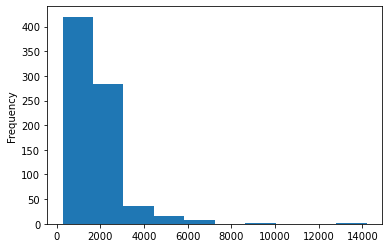

In [98]:
rentals["Rent"].plot.hist()

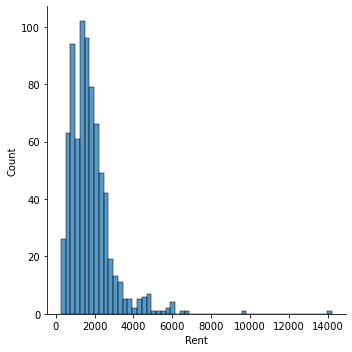

In [99]:
sns.displot(rentals["Rent"])

### Can see most rent is between 0 to 3,000euro.....This is the distribution of rent.